In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
# Configuración para mostrar gráficos en Jupyter Notebook
%matplotlib inline

In [3]:
# Cargar el conjunto de datos Iris
data = load_iris()
X = data.data
y = data.target


In [4]:
# Convertir las etiquetas a formato one-hot encoding
y = to_categorical(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Introducción al Perceptrón Multicapa (MLP)
El Perceptrón Multicapa (MLP) es un tipo de red neuronal artificial que consiste en múltiples capas de neuronas, conectadas de manera que cada neurona de una capa está conectada a todas las neuronas de la siguiente capa. Estas capas son típicamente:

1. **Capa de Entrada:** Recibe las características del conjunto de datos.
2. **Capas Ocultas:** Procesan las características mediante la aplicación de funciones de activación.
3. **Capa de Salida:** Proporciona el resultado final de la red, que puede ser una clasificación, una regresión, etc.

## Arquitectura del MLP

1. **Capa de Entrada:** En nuestro caso, esta capa tendrá 4 neuronas, correspondientes a las 4 características del conjunto de datos Iris.
2. **Capas Ocultas:** Añadiremos dos capas ocultas con 10 neuronas cada una y una función de activación ReLU.
3. **Capa de Salida:** Tendrá 3 neuronas, correspondientes a las 3 clases del conjunto de datos Iris, con una función de activación softmax para la clasificación.

## Función de Activación ReLU
La función de activación ReLU (Rectified Linear Unit) es una de las funciones de activación más utilizadas en las redes neuronales debido a su simplicidad y efectividad. La ecuación de ReLU es:

$$
\text{ReLU}(x) = \max(0, x)
$$

Esto significa que:

- Si $x$ es mayor que 0, ReLU devuelve $x$.
- Si $x$ es menor o igual a 0, ReLU devuelve 0.

## Construcción del Modelo MLP




###  `activation='softmax'`

La función de activación softmax se utiliza comúnmente en la capa de salida de los modelos de clasificación multiclase. Transforma un vector de valores reales en un vector de probabilidades, donde cada valor está entre 0 y 1 y la suma de todos los valores es igual a 1.

La fórmula de la función softmax para un vector de entrada $$z = [z_1, z_2, ..., z_K]$$ es:

$$ \sigma(z)_j = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}} $$

donde $$  \sigma(z)_j  $$ es la probabilidad predicha para la clase $$ (j).$$

### Propiedades y ventajas de la función softmax:

1. **Probabilidades normalizadas**: La salida de softmax proporciona una distribución de probabilidad sobre las clases posibles, lo que es útil para problemas de clasificación.
2. **Diferenciable**: La función softmax es diferenciable, lo que permite utilizarla en el contexto del entrenamiento de redes neuronales mediante retropropagación (BackPropagation).
3. **Interpretabilidad**: Las salidas pueden interpretarse directamente como probabilidades, lo que facilita la interpretación de los resultados del modelo.



In [5]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

#### Desafío 3: Cambiar la Cantidad de Épocas de Entrenamiento



El modelo actual se entrena durante 20 épocas. Intente cambiar el número de épocas de entrenamiento y observe cómo afecta el rendimiento del modelo.



1. Cambie el número de épocas a 10:





2. Cambie el número de épocas a 30:

In [6]:
# Crear el modelo MLP con Dropout + Regularización L2
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu', kernel_regularizer=l2(0.01)))  # Regularización L2 en la capa de entrada
model.add(Dropout(0.5))  # Dropout con tasa del 50%
model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))  # Regularización L2 en la capa oculta
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))  # Regularización L2 en la capa oculta
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # Capa de salida

C:\Users\Hendrik\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:

# Resumen del modelo
model.summary()  #Feed Forward And fully conected, las que se devuelven son recurrentes RNN LStm Y transformets

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.18 KB)

 Trainable params: 303 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

## Compilación del Modelo

Para compilar el modelo, necesitamos especificar el optimizador, la función de pérdida y las métricas de evaluación. Usaremos el optimizador Adam y la función de pérdida `categorical_crossentropy` adecuada para problemas de clasificación multiclase.


### Explicación de `optimizer='adam'`

El optimizador Adam (Adaptive Moment Estimation) es uno de los algoritmos de optimización más utilizados en el entrenamiento de redes neuronales. Combina las ventajas de dos otros algoritmos: AdaGrad y RMSProp.

- **AdaGrad** ajusta la tasa de aprendizaje para cada parámetro individualmente, adaptándose al gradiente de manera que los parámetros con gradientes grandes se actualicen más lentamente y los parámetros con gradientes pequeños se actualicen más rápidamente.
- **RMSProp** adapta la tasa de aprendizaje de cada parámetro basándose en la media móvil del cuadrado de los gradientes, lo que permite manejar de manera eficiente la tasa de aprendizaje en presencia de funciones de pérdida no convexas.

Adam combina estas ideas utilizando estimaciones tanto del primer momento (media) como del segundo momento (varianza) de los gradientes:

1. **Media móvil de los gradientes**: Adam calcula una media móvil exponencial de los gradientes del modelo durante el entrenamiento.
2. **Media móvil del cuadrado de los gradientes**: También calcula una media móvil exponencial del cuadrado de los gradientes.
3. **Corrección de sesgo**: Se aplican correcciones de sesgo para las primeras iteraciones.

La fórmula de actualización para los parámetros es:
$$ \theta_t = \theta_{t-1} - \eta \frac{\hat{m_t}}{\sqrt{\hat{v_t}} + \epsilon} $$

donde:
- $$ \theta_t $$ son los parámetros en el paso $$ t $$
- $$ \eta $$ es la tasa de aprendizaje
- $$ \hat{m_t} $$ es la media móvil corregida de los gradientes
- $$ \hat{v_t} $$ es la media móvil corregida del cuadrado de los gradientes
- $$ \epsilon $$ es un pequeño valor para evitar la división por cero

Adam es conocido por su eficiencia y robustez en el entrenamiento de redes neuronales profundas.


In [25]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Entrenamiento del Modelo

Entrenaremos el modelo utilizando los datos de entrenamiento. Especificamos el número de épocas y el tamaño del lote, además de una porción de datos para validación durante el entrenamiento.



In [26]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=30, batch_size=5, validation_split=0.1)


Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.4730 - loss: 0.9253 - val_accuracy: 0.8333 - val_loss: 0.7976
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5705 - loss: 0.8094 - val_accuracy: 0.7500 - val_loss: 0.8007
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6213 - loss: 0.8312 - val_accuracy: 0.8333 - val_loss: 0.7809
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6572 - loss: 0.8130 - val_accuracy: 1.0000 - val_loss: 0.7686
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6188 - loss: 0.8435 - val_accuracy: 0.9167 - val_loss: 0.7549
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6029 - loss: 0.8859 - val_accuracy: 0.8333 - val_loss: 0.7611
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5068 - loss: 0.9092 - val_accuracy: 0.8333 - val_loss: 0.7732
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7341 - loss: 0.7648 - val_accuracy: 1.0000 - val_l


## Evaluación del Modelo

Evaluaremos el rendimiento del modelo utilizando los datos de prueba.



In [27]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9000 - loss: 0.5410
Precisión en el conjunto de prueba: 90.00%


In [28]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9000 - loss: 0.5410
Precisión en el conjunto de prueba: 90.00%


## Guardar y Cargar el Modelo

Podemos guardar el modelo entrenado para su uso futuro y cargarlo cuando sea necesario.



In [22]:

# Guardar el modelo
model.save('mlp_model_dropout.h5')

# Cargar el modelo
from tensorflow.keras.models import load_model
model = load_model('mlp_model_dropout.h5')


In [23]:
#MIO
# Guardar el modelo
model.save('mlp_model_dropout.h5')

# Cargar el modelo
from tensorflow.keras.models import load_model
model = load_model('mlp_model_dropout.h5')


## Visualización de Resultados

Visualizamos la precisión y la pérdida durante el entrenamiento para entender mejor el rendimiento del modelo.


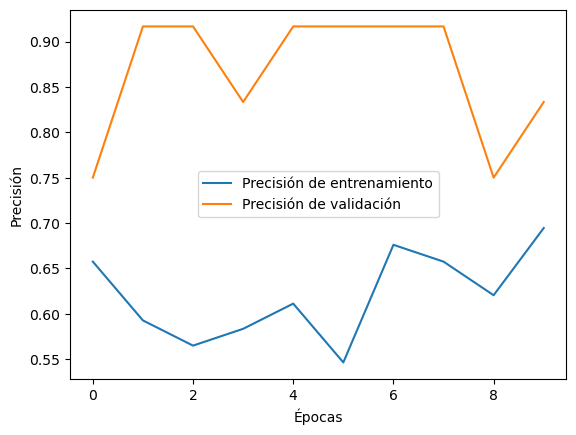

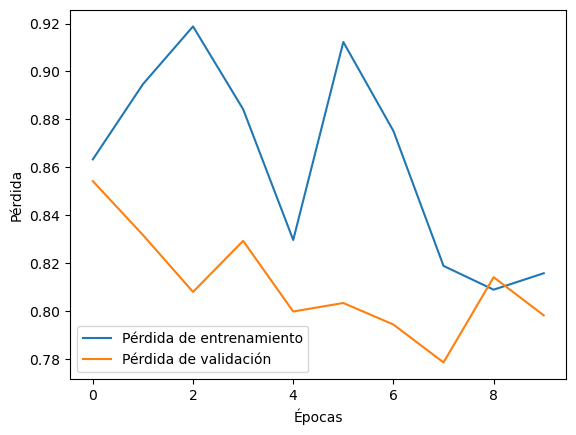

In [24]:
# Graficar la precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


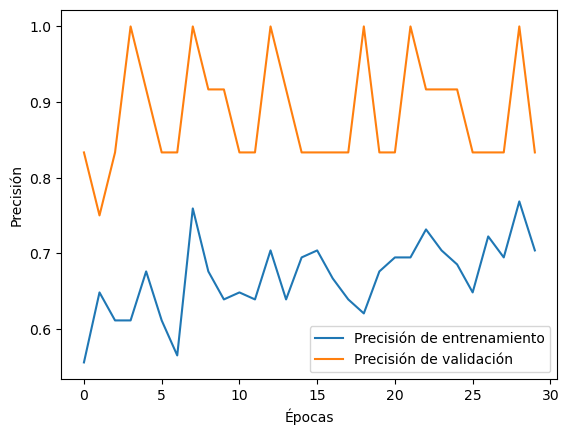

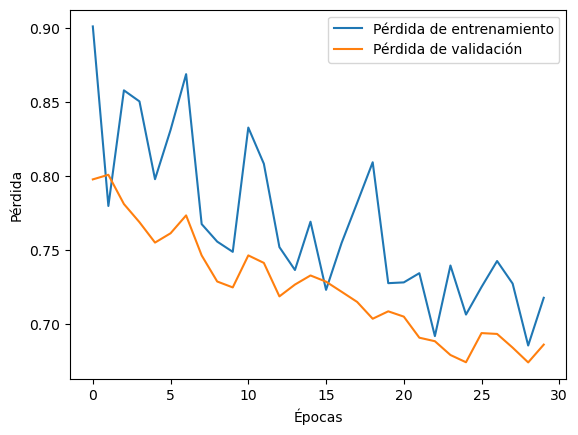

In [29]:
# MIOGraficar la precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


**Pregunta:**

- ¿Cómo afecta el número de épocas a la precisión y la pérdida del modelo durante el entrenamiento y la validación? ¿Observa algún signo de sobreajuste o subajuste?

Como era de esperarse con 10 epocas la precicion es muy baja y el error es muy alto indicando con esto que es un subajuste, por lo cual no ha aprendido lo sufieciente. Mientras que con 30 podemos observar que encomparación con la de 10 hubo una gran mejora y en la perdida aunque esta aun fuera de lo anterior hay mejor relación-